# Imports

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import log_loss

from tqdm.notebook import tqdm

In [5]:
SEED = 0

Setting Custom Color Map as `my_cmap`

In [6]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "m", "green", "cyan"])

## Generate Data
with:
- 1000 sample
- 4 centers/clusters
- 2 features

In [7]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=SEED)

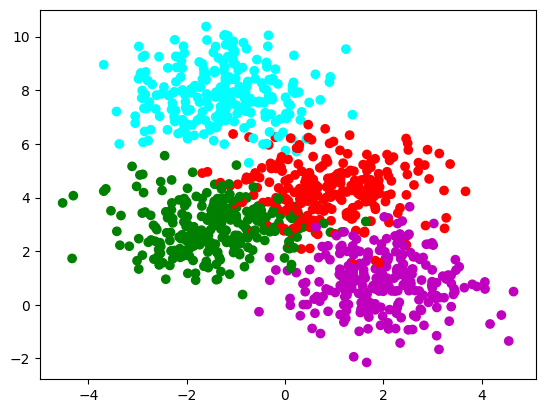

In [8]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap=my_cmap)
plt.show()

In [9]:
# creating data for binary classification
labels_original = labels
labels = np.mod(labels_original, 2)

Setting 2 classes for binary classification

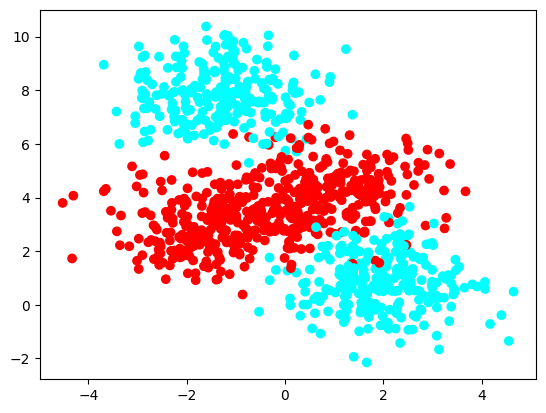

In [10]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap=my_cmap)
plt.show()

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=SEED)

In [12]:
X_train.shape, X_val.shape

((750, 2), (250, 2))

## Simaple FFN architecture:


In [2]:
class Feed_forward_network():
    def __init__(self) -> None:
        self.w1 = np.random.rand()  # x1 -> node1
        self.w2 = np.random.rand()  # x2 -> node1
        self.b1 = 0  # bias1 -> node1

        self.w3 = np.random.rand()  # x1 -> node2
        self.w4 = np.random.rand()  # x2 -> node2
        self.b2 = 0  # bias2 -> node2
        
        self.w5 = np.random.rand()  # node1 -> node3
        self.w6 = np.random.rand()  # node2 -> node3
        self.b3 = 0  # bias3 -> node3

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        self.x1, self.x2 = x

        # Neuron 1
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)

        # Neuron 2
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)

        # Neuron 3
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)

        return self.h3  # returns y
    
    def grad(self, x, y):
        """_summary_

        Parameters
        ----------
        x : _type_
            _description_
        y : _type_
            _description_
        """
        self.forward_pass(x)

        self.dw5 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h1
        self.dw6 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h2
        self.db3 = (self.h3 - y) * self.h3 * (1 - self.h3)

        self.dw1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1
        self.dw2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x2
        self.db1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1)

        self.dw3 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x1
        self.dw4 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x2
        self.db2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2)
    
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialize = True, display_loss = False):
        """_summary_

        Parameters
        ----------
        X : _type_
            _description_
        Y : _type_
            _description_
        epochs : int, optional
            _description_, by default 1
        learning_rate : int, optional
            _description_, by default 1
        initialize : bool, optional
            _description_, by default True
        display_loss : bool, optional
            _description_, by default False
        """
        if initialize:
            self.w1 = np.random.rand()  # x1 -> node1
            self.w2 = np.random.rand()  # x2 -> node1
            self.b1 = 0  # bias1 -> node1

            self.w3 = np.random.rand()  # x1 -> node2
            self.w4 = np.random.rand()  # x2 -> node2
            self.b2 = 0  # bias2 -> node2
            
            self.w5 = np.random.rand()  # node1 -> node3
            self.w6 = np.random.rand()  # node2 -> node3
            self.b3 = 0  # bias3 -> node3
        
        if display_loss:
            loss = {}
        
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0] * 9
            for x, y in zip(X, Y):
                self.grad(x, y)
                
                dw1 += self.dw1
                dw2 += self.dw2
                
                dw3 += self.dw3
                dw4 += self.dw4
                
                dw5 += self.dw5
                dw6 += self.dw6
                
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel("Epochs ->")
            plt.ylabel("MSE ->")
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

  0%|          | 0/1000 [00:00<?, ?epoch/s]

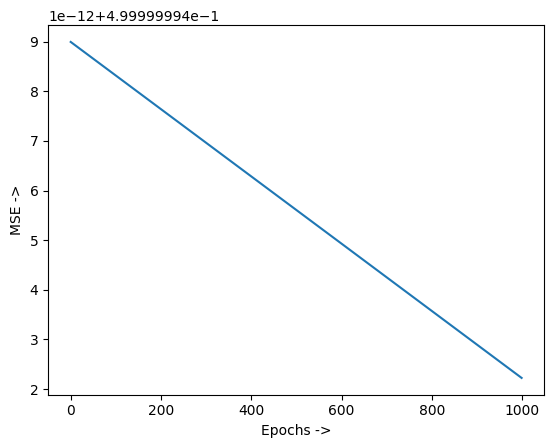

In [14]:
ffn = Feed_forward_network()
ffn.fit(X_train, Y_train, epochs=1000, learning_rate=1, display_loss=True)

  0%|          | 0/1000 [00:00<?, ?epoch/s]

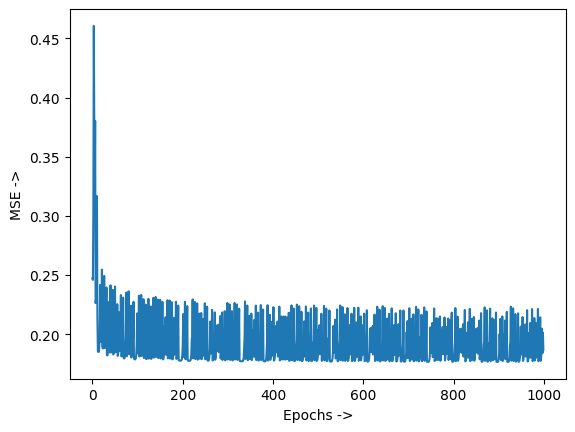

In [15]:
ffn = Feed_forward_network()
ffn.fit(X_train, Y_train, epochs=1000, learning_rate=0.1, display_loss=True)

  0%|          | 0/1000 [00:00<?, ?epoch/s]

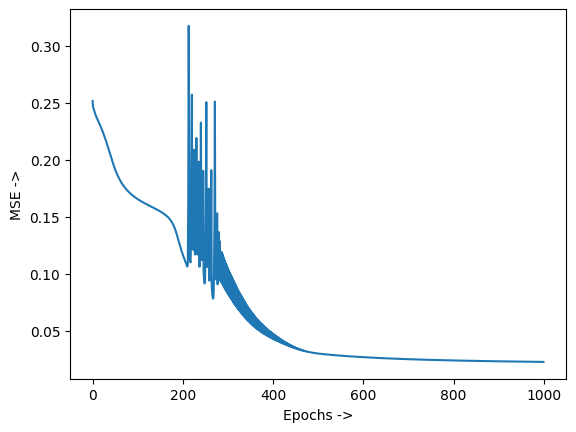

In [22]:
ffn = Feed_forward_network()
ffn.fit(X_train, Y_train, epochs=1000, learning_rate=0.01, display_loss=True)

In [23]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


  0%|          | 0/1000 [00:00<?, ?epoch/s]

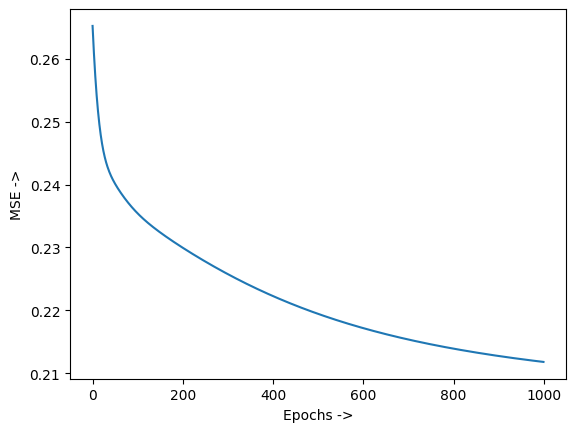

In [20]:
ffn = Feed_forward_network()
ffn.fit(X_train, Y_train, epochs=1000, learning_rate=0.001, display_loss=True)

In [21]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.67
Validation accuracy 0.64


## A Generic FFN